# -- Zomato Restaurant Analysis Bangalore --

#### - Import the required libraries

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

#### - Reading in the data

In [79]:
zomato_df = pd.read_csv('./zomato.csv')

#Setting view options

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

#Displaying the first 5 rows of data
zomato_df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [80]:
#Understanding our data

print(zomato_df.shape) #Gives us the number of rows in the dataset

zomato_df.columns #This gives us all the column headers

(51717, 17)


Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [81]:
#Let's get rid of the columns we don't require

zomato_df = zomato_df.drop(['url','address','phone','menu_item','dish_liked','reviews_list'],axis= 1)

#Review the data post dropping the columns

zomato_df.head()


,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [82]:
#Let's get some more information on our dataset

zomato_df.info()

#As can be seen below we have some null values in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
 10  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.3+ MB


#### - Dropping duplicate rows

In [83]:
#Dropping duplicate values
zomato_df.drop_duplicates(inplace= True)

#Verifying changes
zomato_df.shape

(51609, 11)

#### - Cleaning the data

In [84]:
#Let's start with the 'Rate' column
#Begin by looking at the unique values in the column

zomato_df['rate'].unique()

#As you can see there are some string present in the column

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [85]:
#Let's begin by removing the '/5' from the values
#It's easier to just analyse simple float values
#We'll create a function to perform the above

#We are creating the function and calling it 'handlerate'
def handlerate(value):
    if value=='NEW' or value=='-':
        return np.nan
    else:
        value = str(value).split('/') #indicating to split on /
        value = value[0] #taking the value at the first index from the list
        return float(value) #converting it to a float

#Applying the function on the 'rate' column
zomato_df['rate'] = zomato_df['rate'].apply(handlerate)

#Verifiying the changes
zomato_df['rate'].head()


0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [86]:
#How many null values do we have in the rate column?
#As we can see below we have 10k null values present in the rate column
#Now we must decide whether to remove them or treat them?

zomato_df['rate'].isnull().sum()


10019

#### - Handling the null data

In [87]:
#Now let's take a look at our null values
#For the rate column we'll replace the null values with the mean of the column

zomato_df['rate'].fillna(zomato_df['rate'].mean(), inplace = True)

#Let's check for null values in the rate column
#As you can see all the null values have been treated
#In this case replaced by the mean value of the column

zomato_df['rate'].isnull().sum()


0

In [88]:
#Let's run zomato_df.info() again
#This will help us decide which column with null values needs to be treated next

zomato_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 51609 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51609 non-null  object 
 1   online_order                 51609 non-null  object 
 2   book_table                   51609 non-null  object 
 3   rate                         51609 non-null  float64
 4   votes                        51609 non-null  int64  
 5   location                     51588 non-null  object 
 6   rest_type                    51382 non-null  object 
 7   cuisines                     51564 non-null  object 
 8   approx_cost(for two people)  51265 non-null  object 
 9   listed_in(type)              51609 non-null  object 
 10  listed_in(city)              51609 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.7+ MB


In [89]:
#As can be seen above the location, res_type, cuisines and approx_cost columns have null values
#Since the number of null values are very limited in these columns, we'll just go ahead with dropping them

zomato_df.dropna(inplace = True)

#Verifiying the changes
#As we can see null values are no longer present in the dataset

zomato_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 51042 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51042 non-null  object 
 1   online_order                 51042 non-null  object 
 2   book_table                   51042 non-null  object 
 3   rate                         51042 non-null  float64
 4   votes                        51042 non-null  int64  
 5   location                     51042 non-null  object 
 6   rest_type                    51042 non-null  object 
 7   cuisines                     51042 non-null  object 
 8   approx_cost(for two people)  51042 non-null  object 
 9   listed_in(type)              51042 non-null  object 
 10  listed_in(city)              51042 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.7+ MB


In [90]:
#We would also like to rename some columns for easier understanding

zomato_df.rename(columns= {'approx_cost(for two people)':'Cost2People', 'listed_in(type)':'Type'}, inplace= True)

#Verify your changes

zomato_df.head()


,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2People,Type,listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [91]:
#Now let's take a look at the 'location' column
#I want to understand how many unique locations I have
#As can be seen we have 93 unique locations

zomato_df['location'].nunique()

93

In [92]:
#We noticed that we had two similar columns
#location and listed_in(city), both seem to have similar values
#Let's see how many unique values we have in the listed_in(city) column
#As we can see below we have 30 unique locations

zomato_df['listed_in(city)'].nunique()


30

In [93]:
#Let's keep only one of the columns, since we have identical data
#We'll be dropping the listed_in(city) column

zomato_df = zomato_df.drop(['listed_in(city)'], axis = 1)


In [94]:
#Let's take a look a the unique values in cost to plates
#We have 70 unique values present in the column

zomato_df['Cost2People'].nunique()

70

In [95]:
#Also we noticed that the value in the 'Cost2People' column contain commas
#This prevents them from becoming integers or floats
#We need to get rid of these commas, we'll define a function to handle this

def handlecomma(value): #define the function
    value = str(value) #convert input value to string
    if',' in value: #set condition if comma is present
        value = value.replace(',', '') #replace the comma with nothing
        return float(value) #output should be a float value
    else:
        return float(value) #if not comma is present, return a float value
    

#Let's test our function

zomato_df['Cost2People'] = zomato_df['Cost2People'].apply(handlecomma)

#Verify the changes
#As you can see the values no longer contain commas and are all floats

zomato_df['Cost2People'].unique()


array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [96]:
#The next column we want to clean is the 'rest_type' column
#Let's begin by taking a look at the unique values
#As we can see there many unique values

zomato_df['rest_type'].value_counts()


Quick Bites                      19010
Casual Dining                    10253
Cafe                              3682
Delivery                          2574
Dessert Parlor                    2242
Takeaway, Delivery                2008
Bakery                            1140
Casual Dining, Bar                1130
Beverage Shop                      863
Bar                                686
Food Court                         616
Sweet Shop                         468
Bar, Casual Dining                 411
Lounge                             395
Pub                                355
Fine Dining                        345
Casual Dining, Cafe                311
Beverage Shop, Quick Bites         293
Bakery, Quick Bites                286
Mess                               264
Pub, Casual Dining                 255
Sweet Shop, Quick Bites            178
Kiosk                              176
Dessert Parlor, Cafe               175
Cafe, Casual Dining                173
Cafe, Bakery             

In [97]:
#We can cluster the values which are lower in number
#Let's start by getting all the values which are less that 1000
#We will store these values in a new variable
#Before we do that let's create a variable to get all the rest_type values

rest_types = zomato_df['rest_type'].value_counts(ascending = False)
rest_types

#Let's create a new variable that will filter out all values less than 1000

rest_types_lessthan1000 = rest_types[rest_types<1000]

#View the new variable

rest_types_lessthan1000

Beverage Shop                    863
Bar                              686
Food Court                       616
Sweet Shop                       468
Bar, Casual Dining               411
Lounge                           395
Pub                              355
Fine Dining                      345
Casual Dining, Cafe              311
Beverage Shop, Quick Bites       293
Bakery, Quick Bites              286
Mess                             264
Pub, Casual Dining               255
Sweet Shop, Quick Bites          178
Kiosk                            176
Dessert Parlor, Cafe             175
Cafe, Casual Dining              173
Cafe, Bakery                     163
Cafe, Dessert Parlor             148
Bakery, Dessert Parlor           147
Microbrewery, Casual Dining      130
Casual Dining, Pub               127
Dessert Parlor, Quick Bites      125
Takeaway                         116
Cafe, Quick Bites                111
Quick Bites, Beverage Shop       101
Food Court, Quick Bites          100
D

In [98]:
#We'll now define a function that will rename the rest_types_lessthan1000 as others

def handle_rest_type(value):
    if (value in rest_types_lessthan1000):
        return 'others'
    else:
        return value
    
#Let's test our new fucntion on the rest_types_lessthan1000 variable

zomato_df['rest_type'] = zomato_df['rest_type'].apply(handle_rest_type)

#Confirm changes

zomato_df['rest_type'].value_counts()


Quick Bites           19010
Casual Dining         10253
others                 9003
Cafe                   3682
Delivery               2574
Dessert Parlor         2242
Takeaway, Delivery     2008
Bakery                 1140
Casual Dining, Bar     1130
Name: rest_type, dtype: int64

In [99]:
#The next column we'll clean is the 'location' column
#Let's take a look at the value in this column
#As we can see there are many unique values present

zomato_df['location'].value_counts()


BTM                              5056
HSR                              2494
Koramangala 5th Block            2479
JP Nagar                         2218
Whitefield                       2105
Indiranagar                      2026
Jayanagar                        1916
Marathahalli                     1805
Bannerghatta Road                1609
Bellandur                        1268
Electronic City                  1246
Koramangala 1st Block            1236
Brigade Road                     1210
Koramangala 7th Block            1174
Koramangala 6th Block            1127
Sarjapur Road                    1047
Koramangala 4th Block            1017
Ulsoor                           1011
Banashankari                      902
MG Road                           893
Kalyan Nagar                      841
Richmond Road                     803
Malleshwaram                      721
Frazer Town                       714
Basavanagudi                      684
Residency Road                    671
Brookefield 

In [100]:
#Let's create a function that will help us cluster values less than 300
#We'll begin by creating a variable to store values with less than 300 frequency

location = zomato_df['location'].value_counts(ascending = False)

#Create a variable to store all value with less than 300

location_lessthan300 = location[location<300]


def handle_location(value):
    if(value in location_lessthan300):
        return 'others'
    else:
        return value

#Let's test our function on the location column

zomato_df['location'] = zomato_df['location'].apply(handle_location)

#Verify the changes

zomato_df['location'].value_counts()



BTM                      5056
others                   4954
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
Indiranagar              2026
Jayanagar                1916
Marathahalli             1805
Bannerghatta Road        1609
Bellandur                1268
Electronic City          1246
Koramangala 1st Block    1236
Brigade Road             1210
Koramangala 7th Block    1174
Koramangala 6th Block    1127
Sarjapur Road            1047
Koramangala 4th Block    1017
Ulsoor                   1011
Banashankari              902
MG Road                   893
Kalyan Nagar              841
Richmond Road             803
Malleshwaram              721
Frazer Town               714
Basavanagudi              684
Residency Road            671
Brookefield               656
New BEL Road              644
Banaswadi                 640
Kammanahalli              639
Rajajinagar               591
Church Street             566
Lavelle Ro

In [101]:
#The next column we'll clean is the 'cuisines' column

cuisines = zomato_df['cuisines'].value_counts(ascending = False)

#Create a variable to store the values with less than 100

cuisines_lessthan100 = cuisines[cuisines<100]

#Define the function to do the above

def handle_cuisines(value):
    if(value in cuisines_lessthan100):
        return 'others'
    else:
        return value

#Apply the new function to the cuisines column

zomato_df['cuisines'] = zomato_df['cuisines'].apply(handle_cuisines)

#Verify the changes

zomato_df['cuisines'].value_counts()


others                                              26159
North Indian                                         2852
North Indian, Chinese                                2351
South Indian                                         1820
Biryani                                               903
Bakery, Desserts                                      898
Fast Food                                             796
Desserts                                              754
Cafe                                                  725
South Indian, North Indian, Chinese                   724
Bakery                                                649
Chinese                                               552
Ice Cream, Desserts                                   415
Chinese, North Indian                                 405
Mithai, Street Food                                   363
Desserts, Ice Cream                                   349
North Indian, Chinese, Biryani                        345
South Indian, 

#### - Now that the data is clean and we've verified the same. Let's start with visualisation

- Q1 Which location has the most number of restaurants?

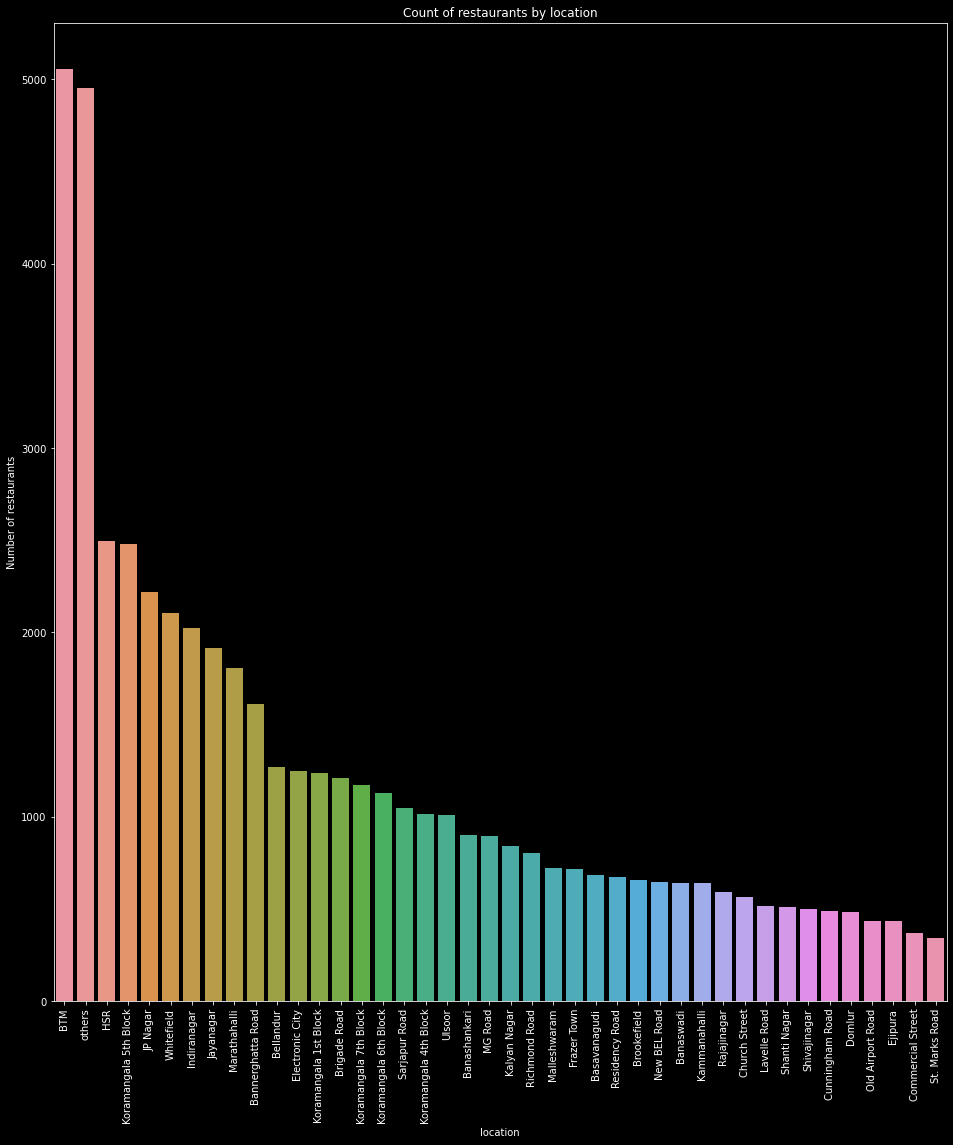

In [107]:
#Let's create a count plot of the various locations

#Setting the figure size

plt.figure(figsize = (16,18))

#Creating the plot

ax = sns.countplot(data = zomato_df, x = 'location', order = zomato_df['location'].value_counts().index)

#Setting the title

plt.title('Count of restaurants by location')

#Setting the ticks on the x axis

plt.xticks(rotation = 90)

#Setting the label on y axis

plt.ylabel('Number of restaurants')

#Show the plot

plt.show()


#### - From the above chart I can tell that most of the restaurants are in the BTM, HSR and Koramanagala locations. So if I want to open a restaurant I shouldn't do it here due to high competition.

- Q2 How many restaurants offer table booking option?

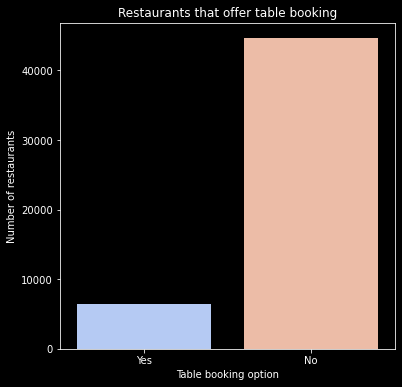

In [111]:
#Let's create a count plot for the option of booking tables

#Setting the figure size

plt.figure(figsize = (6,6))

#Creating the plot

ax = sns.countplot(data = zomato_df, x = 'book_table', palette = 'coolwarm')

#Setting the title

plt.title('Restaurants that offer table booking')


#Setting the labels

plt.xlabel('Table booking option')

plt.ylabel('Number of restaurants')

#Show the plot

plt.show()

#### - As we can see from the above plot majority of the restaurants don't offer the option to book a table.

- Q3 What is usual rating of restaurants that allow the option to order online?

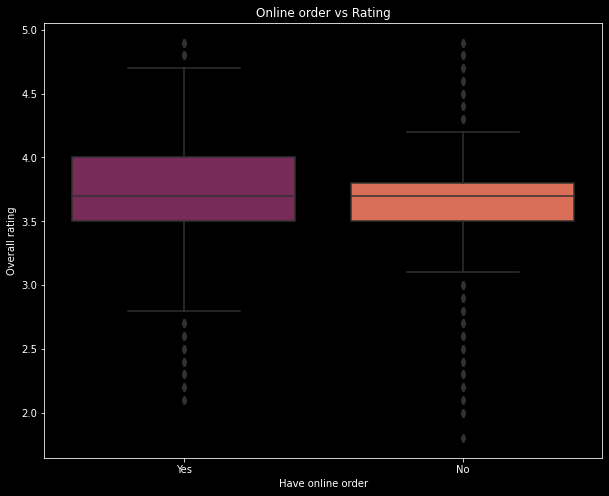

In [121]:
#Let's create a box plot for online order vs rating

#Setting the figure size

plt.figure(figsize = (10,8))

#Creating the plot

ax = sns.boxplot(data = zomato_df, x = 'online_order', y = 'rate', palette = 'rocket')

#Setting the title

plt.title('Online order vs Rating')

#Setting the labels

plt.xlabel('Have online order')

plt.ylabel('Overall rating')

#Show the plot

plt.show()


#### - As we can see from the above plot restaurants that offer online ordering option have a higher overall maximum rating. Although as can be seen by the middle lines of the boxes, the average rating remains more or less the same.

- Q4 What is the average rating for restaurants that allow the book tabel option?

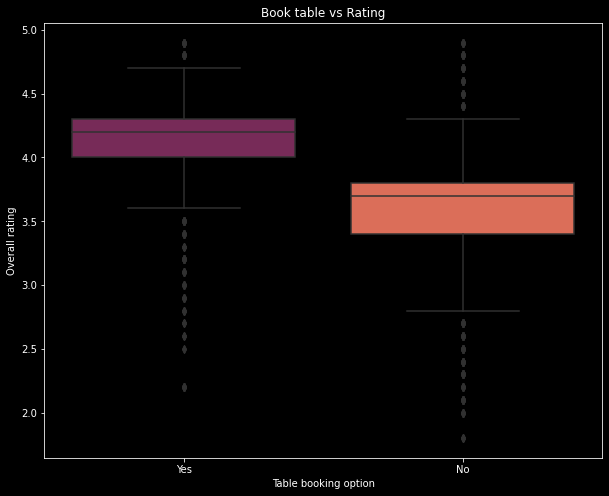

In [122]:
#Let's create a box plot for the option of booking tables

#Setting the figure size

plt.figure(figsize = (10,8))

#Creating the plot

ax = sns.boxplot(data = zomato_df, x = 'book_table', y = 'rate', palette = 'rocket')

#Setting the title

plt.title('Book table vs Rating')

#Setting the labels

plt.xlabel('Table booking option')

plt.ylabel('Overall rating')

#Show the plot

plt.show()


#### - Here you can very clearly see the difference. Restaurants that offer the option to book a table, have an overall higher average rating compared to those who don't.

- Q5 What restaurant locations offer online order facility in Bangalore?

In [127]:
#We'll need to get some specific before we can visualise this data
#To answer the above question it would be good to group our data, based on location

#Create a new dataframe to store the grouped data

grouped_df = zomato_df.groupby(['location','online_order'])['name'].count()

grouped_df.to_csv('location_online.csv') #creating a new csv for the grouped data

grouped_df = pd.read_csv('location_online.csv') #reading in the new csv

#Creating a pivot table to get a better understanding of the data

grouped_df = pd.pivot_table(grouped_df, values=None, index=['location'], columns=['online_order'], fill_value=0, aggfunc=np.sum)

#Displaying the pivot table

grouped_df

name      
online_order             No   Yes
location                         
BTM                    1763  3293
Banashankari            397   505
Banaswadi               302   338
Bannerghatta Road       685   924
Basavanagudi            243   441
Bellandur               517   751
Brigade Road            552   658
Brookefield             239   417
Church Street           226   340
Commercial Street       228   142
Cunningham Road         168   322
Domlur                  247   235
Ejipura                 214   219
Electronic City         676   570
Frazer Town             287   427
HSR                     584  1910
Indiranagar             697  1329
JP Nagar                911  1307
Jayanagar               552  1364
Kalyan Nagar            350   491
Kammanahalli            264   375
Koramangala 1st Block   384   852
Koramangala 4th Block   459   558
Koramangala 5th Block   866  1613
Koramangala 6th Block   445   682
Koramangala 7th Block   389   785
Lavelle Road            315   203
MG Road                 520   373
Malleshwaram            309   412
Marathahalli            701  1104
New BEL Road            255   389
Old Airport Road        221   216
Rajajinagar             286   305
Residency Road          424   247
Richmond Road           557   246
Sarjapur Road           323   724
Shanti Nagar            289   219
Shivajinagar            354   144
St. Marks Road          176   167
Ulsoor                  389   622
Whitefield              986  1119
others                 2064  2890

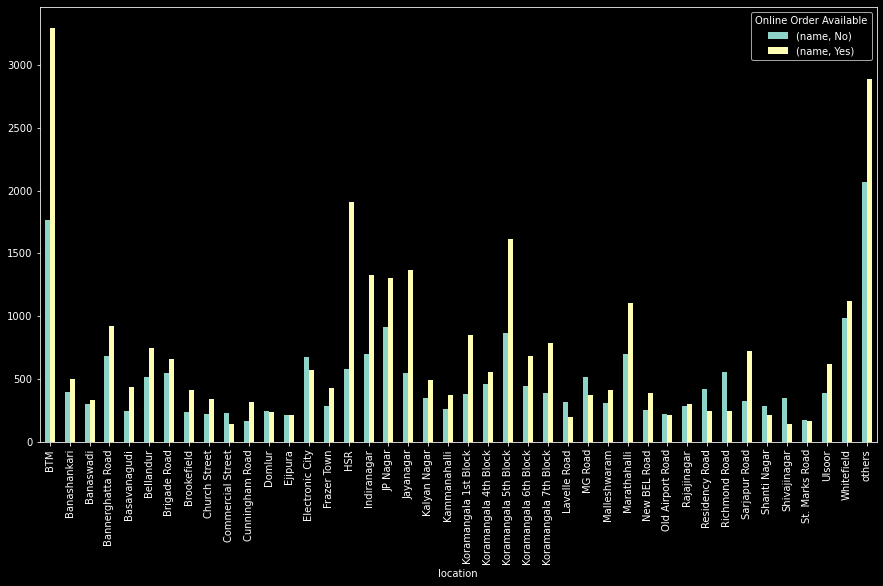

In [133]:
#Now that we have a better understanding, let's plot the table

grouped_df.plot(kind = 'bar', figsize = (15,8))

plt.legend(title = 'Online Order Available', fancybox=True)

plt.show()

#### - As we can in locations such as Lavelle road, MG road, Richmond road and Electronic city there are many restaurants that do not provide online order facility, which could be something that a new restaurant could solve for.

- Q6 Which locations offer the book table option?

In [134]:
#To answer the above question it would be good to group our data, based on location

#Create a new dataframe to store the grouped data

grouped_df2 = zomato_df.groupby(['location','book_table'])['name'].count() #Here we'll take a the count of restaurants using the name column

grouped_df2.to_csv('location_booktable.csv') #creating a new csv for the grouped data

grouped_df2 = pd.read_csv('location_booktable.csv') #reading in the new csv

#Creating a pivot table to get a better understanding of the data

grouped_df2 = pd.pivot_table(grouped_df2, values=None, index=['location'], columns=['book_table'], fill_value=0, aggfunc=np.sum)

#Displaying the pivot table

grouped_df2

name     
book_table               No  Yes
location                        
BTM                    4889  167
Banashankari            839   63
Banaswadi               632    8
Bannerghatta Road      1510   99
Basavanagudi            668   16
Bellandur              1170   98
Brigade Road           1034  176
Brookefield             582   74
Church Street           385  181
Commercial Street       370    0
Cunningham Road         315  175
Domlur                  427   55
Ejipura                 433    0
Electronic City        1148   98
Frazer Town             706    8
HSR                    2277  217
Indiranagar            1578  448
JP Nagar               1903  315
Jayanagar              1637  279
Kalyan Nagar            692  149
Kammanahalli            590   49
Koramangala 1st Block  1186   50
Koramangala 4th Block   695  322
Koramangala 5th Block  1787  692
Koramangala 6th Block  1015  112
Koramangala 7th Block  1012  162
Lavelle Road            290  228
MG Road                 546  347
Malleshwaram            632   89
Marathahalli           1642  163
New BEL Road            588   56
Old Airport Road        378   59
Rajajinagar             550   41
Residency Road          522  149
Richmond Road           687  116
Sarjapur Road           893  154
Shanti Nagar            451   57
Shivajinagar            475   23
St. Marks Road          219  124
Ulsoor                  834  177
Whitefield             1852  253
others                 4587  367

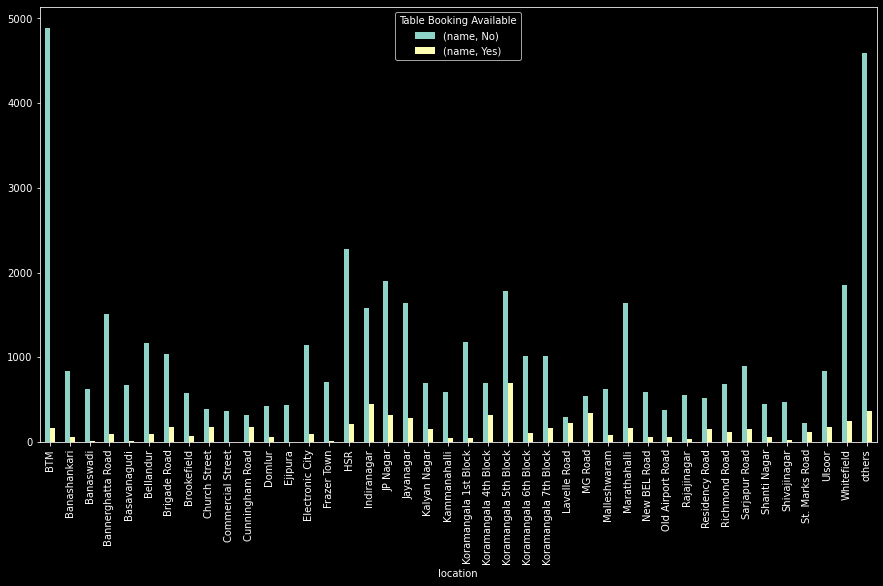

In [135]:
#Now that we have a better understanding, let's plot the table

grouped_df2.plot(kind = 'bar', figsize = (15,8))

plt.legend(title = 'Table Booking Available', fancybox=True)

plt.show()

#### - As we can see most locations don't offer a book table option. So if I was to open a restaurant that offered this facility in HSR or Banaswadi, I could see good turnout for customers who prefer to book tables.

- Q7 Which restaurant types have the best ratings?

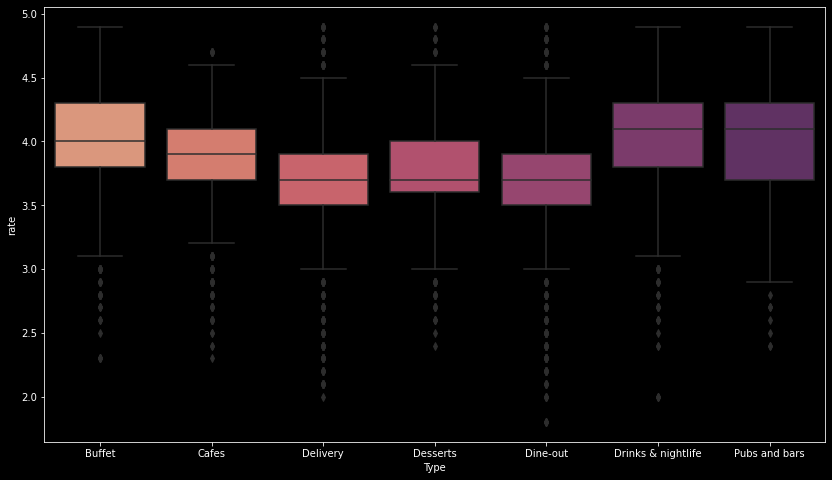

In [142]:
#Let's visualise this using a boxplot

plt.figure(figsize = (14,8))

sns.boxplot(data = zomato_df, x = 'Type', y = 'rate', palette = 'flare')

plt.show()

#### - As you can see, Drinks & Nightlife and Pubs & Bars have the highest average rating amongst all the restaurant types.

- Q8 Which types of restaurants are most common by location?

In [143]:
#To answer the above question it would be good to group our data, based on location

#Create a new dataframe to store the grouped data

grouped_df3 = zomato_df.groupby(['location','Type'])['name'].count() #Here we'll take a the count of restaurants using the name column

grouped_df3.to_csv('location_Type.csv') #creating a new csv for the grouped data

grouped_df3 = pd.read_csv('location_Type.csv') #reading in the new csv

#Creating a pivot table to get a better understanding of the data

grouped_df3 = pd.pivot_table(grouped_df3, values=None, index=['location'], columns=['Type'], fill_value=0, aggfunc=np.sum)

#Displaying the pivot table

grouped_df3

name                                   \
Type                  Buffet Cafes Delivery Desserts Dine-out   
location                                                        
BTM                       21    83     3053      198     1660   
Banashankari               7    36      418       71      356   
Banaswadi                  0    24      310       37      262   
Bannerghatta Road          9    46      828      137      578   
Basavanagudi               7    11      344       66      251   
Bellandur                 28    36      617       75      479   
Brigade Road              25    46      497      108      455   
Brookefield                6    17      339       45      245   
Church Street             19    51      193       29      215   
Commercial Street          0    13      121       77      159   
Cunningham Road           29    34      194       26      184   
Domlur                    15    13      261       35      135   
Ejipura                    0     0      245       16      172   
Electronic City           23    24      570       71      516   
Frazer Town                1    11      470       56      172   
HSR                       19    49     1694      120      580   
Indiranagar               38    97     1091      140      529   
JP Nagar                  45    76     1151      166      722   
Jayanagar                 27    77     1043      182      575   
Kalyan Nagar               9    45      366       88      315   
Kammanahalli               2    27      329       35      240   
Koramangala 1st Block      3    26      716       70      398   
Koramangala 4th Block     21    53      464       81      302   
Koramangala 5th Block     65   146     1075      209      842   
Koramangala 6th Block     18    43      511       70      411   
Koramangala 7th Block     25    52      503      127      417   
Lavelle Road              30    27      127       50      191   
MG Road                   51    76      266       68      343   
Malleshwaram              11    31      269       85      291   
Marathahalli              34    32      980      105      630   
New BEL Road               4    29      338       33      224   
Old Airport Road          12     5      200       35      164   
Rajajinagar               10     4      258       55      251   
Residency Road            20    31      187       63      289   
Richmond Road             63    21      257       78      356   
Sarjapur Road             25    22      558       82      319   
Shanti Nagar               9    22      198       39      229   
Shivajinagar               6    17      143       37      280   
St. Marks Road             5    10      111       10      145   
Ulsoor                    16    56      456       71      359   
Whitefield                28    51     1041      137      768   
others                    83   133     2787      276     1553   

                                                        
Type                  Drinks & nightlife Pubs and bars  
location                                                
BTM                                   22            19  
Banashankari                          14             0  
Banaswadi                              6             1  
Bannerghatta Road                      9             2  
Basavanagudi                           5             0  
Bellandur                             17            16  
Brigade Road                          57            22  
Brookefield                            4             0  
Church Street                         36            23  
Commercial Street                      0             0  
Cunningham Road                       16             7  
Domlur                                12            11  
Ejipura                                0             0  
Electronic City                       21            21  
Frazer Town                            2             2  
HSR                                   14            18  
Indiranagar    

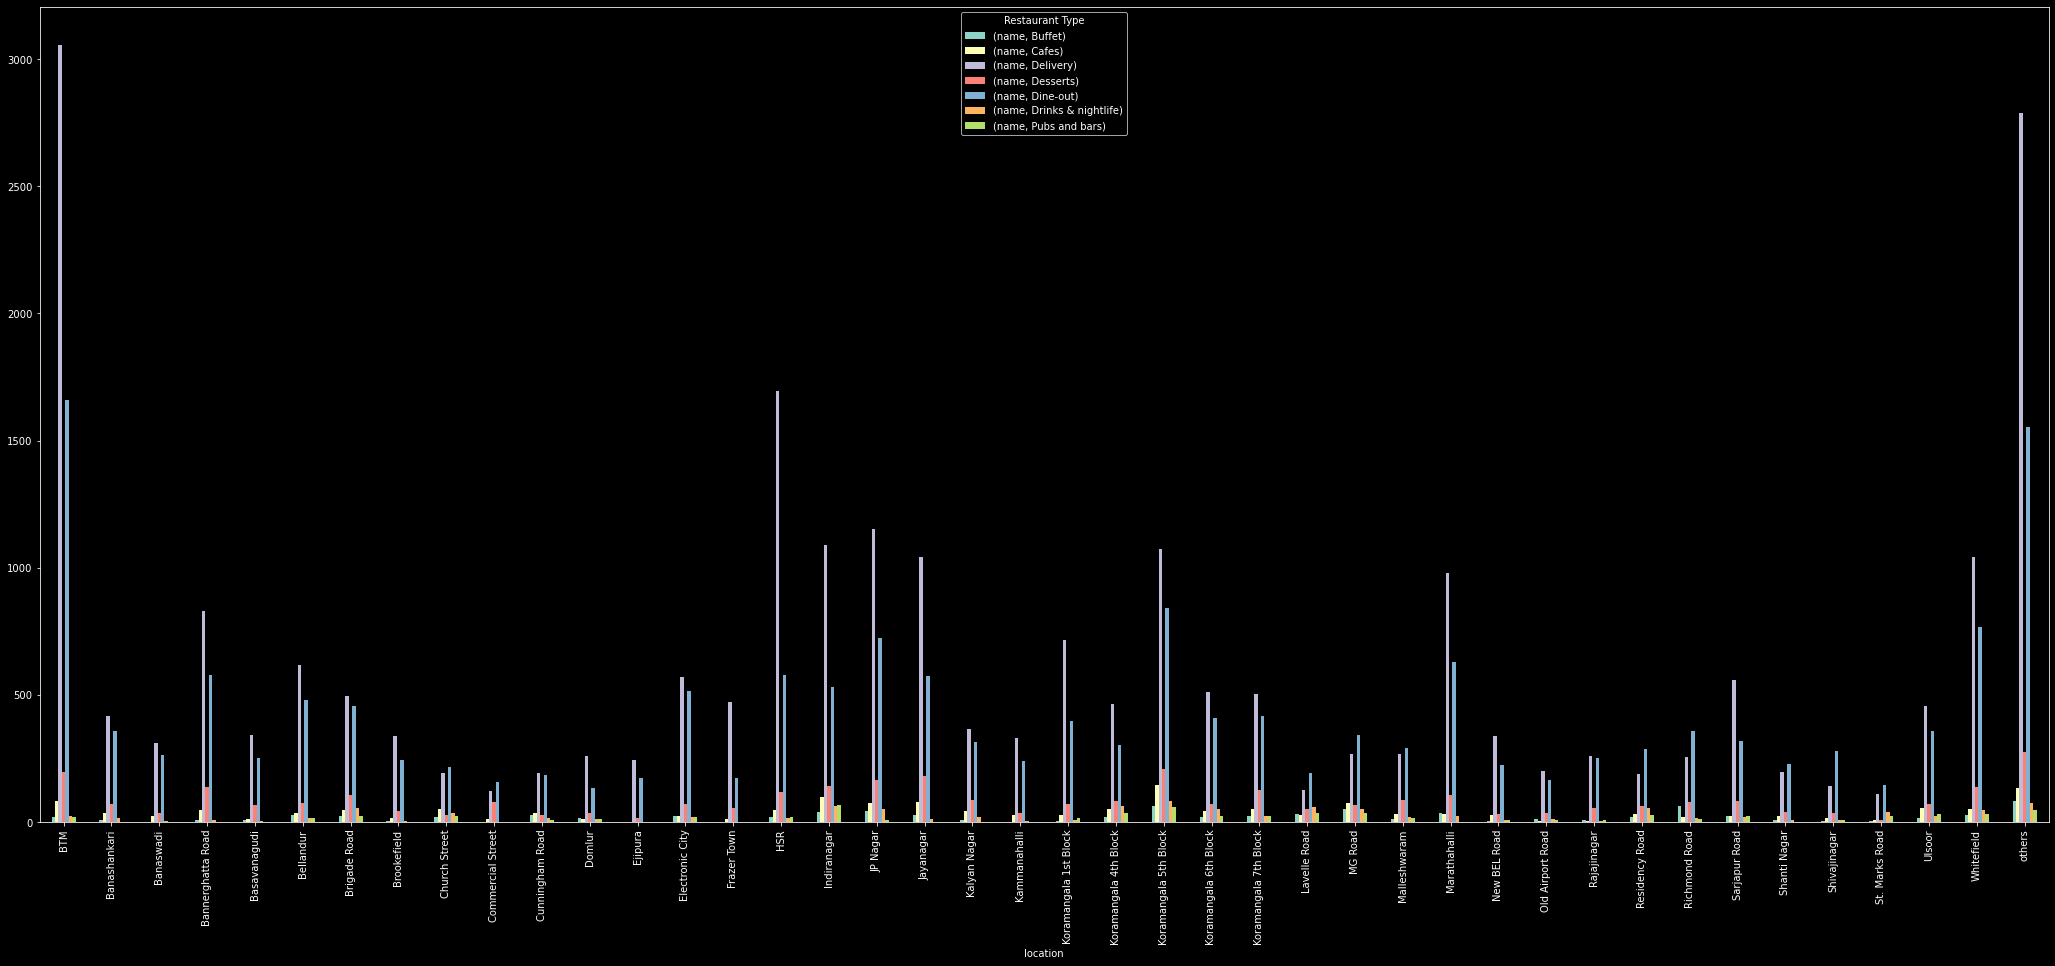

In [148]:
#Now that we have a better understanding, let's plot the table

grouped_df3.plot(kind = 'bar', figsize = (36,15))

plt.legend(title = 'Restaurant Type', fancybox=True)

plt.show()

#### - As can be seen from the above plot, if I wanted to open a pub & bar type of restaurant then I should open it in Kamanahalli

- Q9 Which location has voted the most?

In [149]:
#To answer the above question it would be good to group our data, based on location

#Create a new dataframe to store the grouped data

grouped_df4  = zomato_df[['location', 'votes']] #New dataframe that only contain two columns

grouped_df4.drop_duplicates() 

grouped_df5 = grouped_df4.groupby(['location'])['votes'].sum()

grouped_df5 = grouped_df5.to_frame()

grouped_df5 = grouped_df5.sort_values('votes', ascending = False)

grouped_df5.head()



,votes
location,
Koramangala 5th Block,2214083
Indiranagar,1165909
Koramangala 4th Block,685156
Church Street,590306
JP Nagar,586522


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


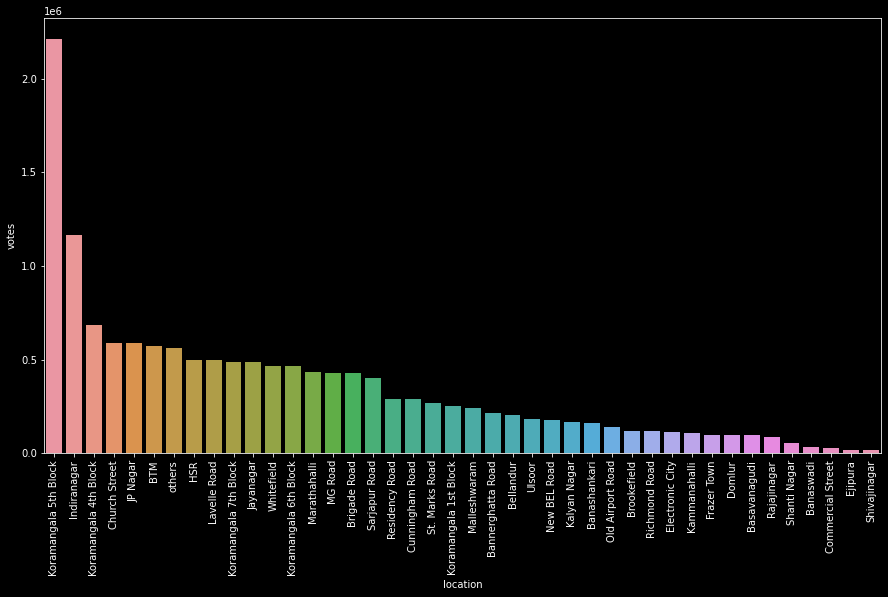

In [153]:
#Let's plot the above data using a simple barplot

plt.figure(figsize = (15,8))

sns.barplot(grouped_df5.index, grouped_df5['votes'])

plt.xticks(rotation = 90)

plt.show()


#### - As you can clearly see from the plot above the best locations to get customer feedback would be Koramangala 5th block and Indiranagar.

- Q10 What are top cuisines?

In [154]:
#To answer the above question it would be good to group our data, based on location

#Create a new dataframe to store the grouped data

grouped_df6  = zomato_df[['cuisines', 'votes']] #New dataframe that only contain two columns

grouped_df6.drop_duplicates() 

grouped_df7 = grouped_df6.groupby(['cuisines'])['votes'].sum()

grouped_df7 = grouped_df7.to_frame()

grouped_df7 = grouped_df7.sort_values('votes', ascending = False)

grouped_df7.head()


,votes
cuisines,
others,11542182
North Indian,516310
"North Indian, Chinese",258225
South Indian,161975
"North Indian, Mughlai",103706


In [156]:
#We want to exclude 'others' from the plot

grouped_df7 = grouped_df7.iloc[1:, :]

grouped_df7.head()

,votes
cuisines,
North Indian,516310
"North Indian, Chinese",258225
South Indian,161975
"North Indian, Mughlai",103706
Chinese,101728


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


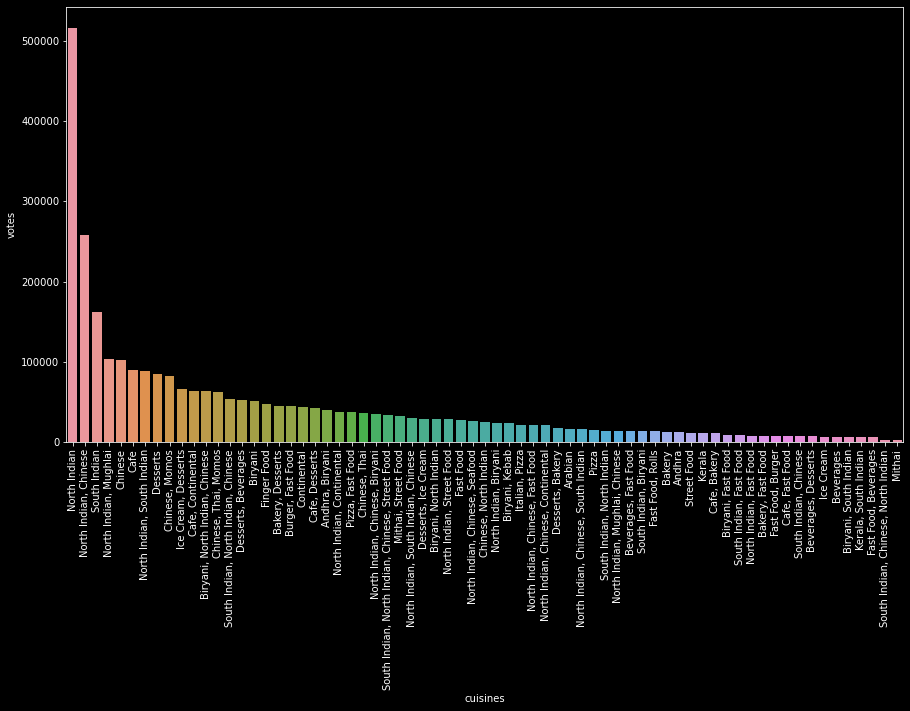

In [157]:
#Let's plot the above table

plt.figure(figsize= (15,8))

sns.barplot(grouped_df7.index, grouped_df7['votes'])

plt.xticks(rotation = 90)

plt.show()

#### - Surprisingly North Indian is the most popular cuisine type